In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline

In [3]:
import time
import json
from importlib import reload
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
from datetime import datetime, timedelta, date

from scipy.stats import norm, linregress, f_oneway
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

import sys, os
sys.path.append(os.path.join(os.path.dirname('.'), '..', 'lib'))
from tdameritrade import tdameritrade_api
#from investing.tdameritrade import cf_strategy
#from investing import price_calcs

In [4]:
td_api = tdameritrade_api.TDAmeritradeAPI.create_api_from_account_file(filename="../private_data/information.json")

### Get data

In [ ]:
tickers = ["AAPL", "NVDA", "JPM"]

**Get quotes**

In [7]:
td_api.get_quotes(tickers).transpose()

,AAPL,JPM,NVDA
52WkHigh,233.47,119.33,292.76
52WkLow,142,91.11,124.46
askId,K,P,P
askPrice,152.36,99.94,148.68
askSize,500,200,200
assetType,EQUITY,EQUITY,EQUITY
bidId,P,P,Q
bidPrice,152.33,99.81,148.64
bidSize,20900,400,200
bidTick,,,


**Price data**

In [8]:
end_date = datetime.today()
start_date = end_date - timedelta(days=300)
bars = td_api.get_price_history(symbols=tickers, start_date=start_date, end_date=end_date)
bars.head(10)

symbol            AAPL                                              JPM  \
price      close_price    high     low open_price    volume close_price   
2018-03-19      175.30  177.47  173.66    177.320  33446771      114.53   
2018-03-20      175.24  176.80  174.94    175.240  19649350      114.64   
2018-03-21      171.27  175.09  171.26    175.040  37054935      114.74   
2018-03-22      168.85  172.68  168.60    170.000  41490767      109.95   
2018-03-23      164.94  169.92  164.94    168.390  41028784      107.01   
2018-03-26      172.77  173.10  166.44    168.070  37541236      110.31   
2018-03-27      168.34  175.15  166.92    173.680  40922579      108.17   
2018-03-28      166.48  170.02  165.19    167.250  41668545      108.00   
2018-03-29      167.78  171.75  166.90    167.805  38398505      109.97   
2018-04-02      166.68  168.94  164.47    167.880  37586791      107.85   

symbol                                                    NVDA          \
price           high      low open_price    volume close_price    high   
2018-03-19  115.4500  113.300     115.10  13214919      241.00  249.35   
2018-03-20  115.4450  114.445     114.87   9921175      249.58  251.15   
2018-03-21  116.6300  114.210     114.81  13632983      248.56  252.00   
2018-03-22  113.6000  109.540     113.20  22550426      241.85  247.88   
2018-03-23  110.9200  106.760     110.27  23081509      232.97  242.67   
2018-03-26  111.1600  108.645     109.19  20217469      244.48  244.53   
2018-03-27  111.6900  107.300     111.07  18039921      225.52  250.00   
2018-03-28  109.1699  106.650     108.28  19189269      221.35  229.39   
2018-03-29  110.7800  107.780     108.50  13274639      231.59  235.50   
2018-04-02  110.7300  106.080     109.96  18822525      221.05  234.65   

symbol                                     
price            low open_price    volume  
2018-03-19  237.0000    248.180  17844338  
2018-03-20  241.1200    241.120  13867409  
2018-03-21  247.3300    249.320  10967216  
2018-03-22  240.3410    246.000  13779919  
2018-03-23  232.5200    242.400  18390461  
2018-03-26  235.9000    238.000  15285640  
2018-03-27  219.8450    247.750  35225012  
2018-03-28  217.0000    224.130  23647648  
2018-03-29  220.7002    224.105  22915692  
2018-04-02  217.5000    228.740  23052315

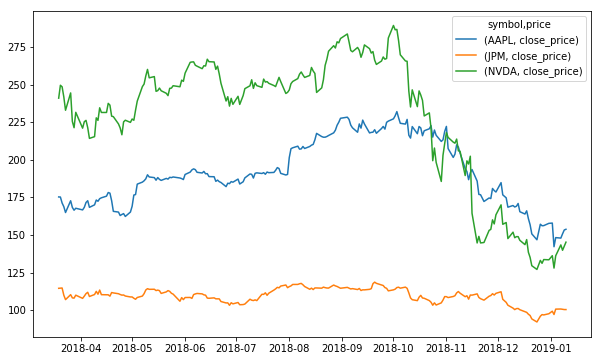

In [9]:
ax = bars.loc[:, (slice(None), 'close_price')].plot(figsize=(10,6))

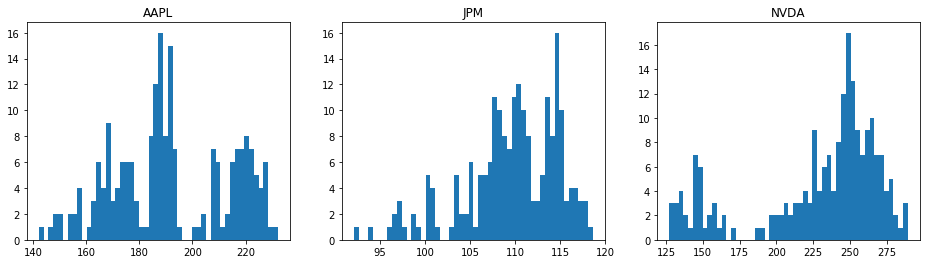

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
for i, sym in enumerate(bars.columns.get_level_values(0).unique()):
    ax[i].hist(bars.loc[:, (sym, 'close_price')], bins=50)
    ax[i].set_title(sym)

**Fundamental Data**

In [14]:
td_api.get_fundamental(tickers).transpose()

,AAPL,JPM,NVDA
beta,1.12214,1.13152,2.05122
bookValuePerShare,2.79895,6.8306,9.51051
currentRatio,1.12384,0,7.08085
divGrowthRate3Year,0,0,0
dividendAmount,2.92,3.2,0.64
dividendDate,2018-11-08 00:00:00.0,2019-01-03 00:00:00.0,2018-11-29 00:00:00.0
dividendPayAmount,0.73,0.56,0.15
dividendPayDate,2018-05-17 00:00:00.0,2018-07-31 00:00:00.0,2018-06-15 00:00:00.0
dividendYield,1.9,3.19,0.44
epsChange,0,0,0


### Create Saved Order

In [16]:
td_api.create_saved_order(symbol="AAPL", quantity=100, price=150, instruction="BUY")